In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sidetable

plt.rcParams["figure.figsize"] = (10,8)
pd.options.display.max_columns = None

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

Utilizamos el archivo limpio final tras la sesión de limpieza V para responder a las hipótesis plenteadas al inicio del sprint.

In [11]:
df = pd.read_csv('../datos/df_bank_clean2.csv', index_col = 0)

In [14]:
def eliminar_nulos(dataframe_completo):
    categoricas = dataframe_completo.select_dtypes(include = 'object')
    numericas = dataframe_completo.select_dtypes(include = np.number)

    # para las categoricas:
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    imputer = imputer.fit(categoricas)
    categoricas_trans = pd.DataFrame(imputer.transform(categoricas), columns = categoricas.columns)
    
    dataframe_completo.drop(categoricas.columns, axis = 1, inplace= True)
    
    dataframe_completo = dataframe_completo.reset_index()
    categoricas_trans = categoricas_trans.reset_index()
    
    dataframe_completo = pd.concat([dataframe_completo, categoricas_trans], axis = 1)
    
    dataframe_completo.drop(['index'], inplace = True, axis = 1)

    # para las numéricas:
    imputer2 = IterativeImputer(n_nearest_features=None, initial_strategy= 'median',imputation_order='ascending')
    imputer2 = imputer2.fit(numericas)
    numericas_trans = pd.DataFrame(imputer2.transform(numericas), columns = numericas.columns)
    
    dataframe_completo.drop(numericas.columns, axis = 1, inplace= True)
    dataframe_completo = dataframe_completo.reset_index()
    numericas_trans = numericas_trans.reset_index()
    
    dataframe_completo = pd.concat([dataframe_completo, numericas_trans], axis = 1)
    
    dataframe_completo.drop(['index'], inplace = True, axis = 1)
    
    return dataframe_completo

In [15]:
df = eliminar_nulos(df)

In [12]:
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day_week
26505,36,blue-collar,single,basic 4y,no,yes,no,cellular,775,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no,"nov, thu",nov,thu
28490,28,blue-collar,single,university degree,no,yes,no,cellular,49,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no,"apr, tue",apr,tue
8990,30,blue-collar,single,basic 9y,NaN,no,no,telephone,420,4,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no,"jun, thu",jun,thu


In [19]:
df.dtypes

job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
poutcome           object
y                  object
month_day_week     object
month              object
day_week           object
age               float64
duration          float64
campaign          float64
pdays             float64
previous          float64
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
dtype: object

1- La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

In [100]:
lista_cat = ['job', 'marital', 'education', 'default']

In [124]:
marital_percent= (df['marital'].value_counts()*100/df.shape[0]).reset_index()
marital_percent

,index,marital
0,married,60.717408
1,single,28.084321
2,divorced,11.198271


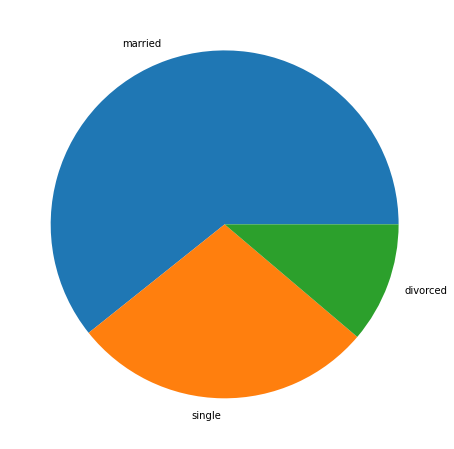

In [126]:
plt.figure()

plt.pie(x = marital_percent['marital'], labels = marital_percent['index'])

plt.show()

               job  count    percent  cumulative_count  cumulative_percent
0   administration  10749  26.105013             10749           26.105013
1      blue-collar   9253  22.471828             20002           48.576841
2       technician   6739  16.366330             26741           64.943171
3         services   3967   9.634253             30708           74.577424
4       management   2924   7.101224             33632           81.678648
5          retired   1718   4.172333             35350           85.850981
6     entrepreneur   1456   3.536040             36806           89.387022
7    self-employed   1421   3.451039             38227           92.838061
8        housemaid   1060   2.574315             39287           95.412376
9       unemployed   1014   2.462600             40301           97.874976
10         student    875   2.125024             41176          100.000000


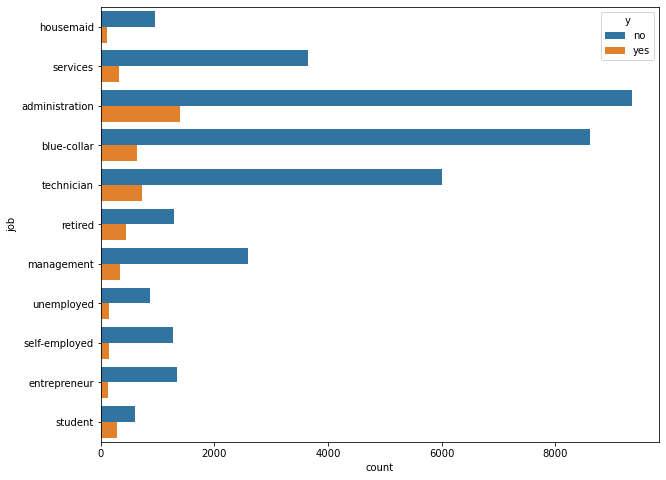

    marital  count    percent  cumulative_count  cumulative_percent
0   married  25001  60.717408             25001           60.717408
1    single  11564  28.084321             36565           88.801729
2  divorced   4611  11.198271             41176          100.000000


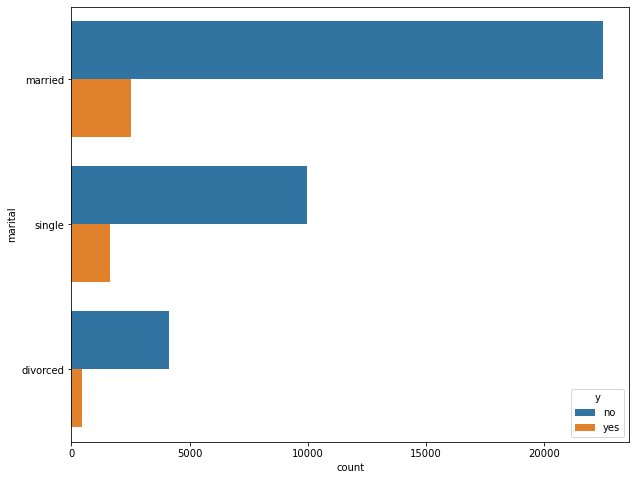

             education  count    percent  cumulative_count  cumulative_percent
0    university degree  13894  33.742957             13894           33.742957
1          high school   9512  23.100835             23406           56.843793
2             basic 9y   6045  14.680882             29451           71.524675
3  professional course   5240  12.725860             34691           84.250534
4             basic 4y   4176  10.141830             38867           94.392364
5             basic 6y   2291   5.563921             41158           99.956285
6           illiterate     18   0.043715             41176          100.000000


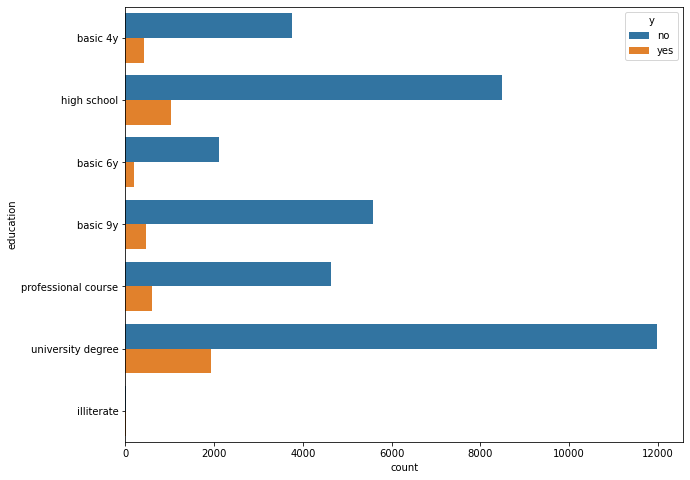

  default  count    percent  cumulative_count  cumulative_percent
0      no  41173  99.992714             41173           99.992714
1     yes      3   0.007286             41176          100.000000


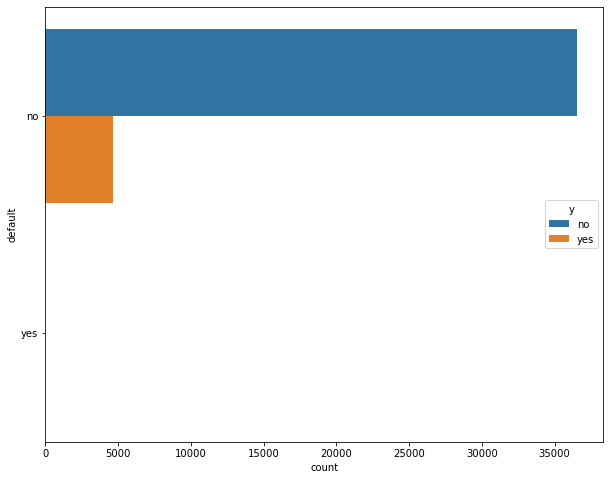

In [101]:
for col in lista_cat: 
    print(df.stb.freq([col]))
    sns.countplot(y = col, hue = 'y', data = df)
    plt.show();

Tomamos la decisión de imprimir las tablas de frecuencias junto a las gráficas para poder contextualizar de manera más certera el análisis, puesto que al exisitir diferencias en el número muestral para cada categoría, las diferencias en los gráficos pueden ser derivadas de este mayor o menor numero muestral y no de una reelación significativa entre las variables a observar.

Encontramos que en general la mayoría de usuarios no aceptan la oferta:
- Por trabajo, encontramos una tendiencia entre los que trabajan en administración, 'blue-collar' y técnicos son quienes más aceptan la oferta y los autónomos, desempleados y emprendedores los que menos tienden a aceptar este tipo de oferta.

- Entre los casados predomina el no, pero son quienes más aceptan este tipo de ofertas al ser una muestra mucho mayor.

- La muestra no cuenta con personas que no hayan finalizado la eduación básica. Los que tienen un grado universitatio presentan la mayoría de los síes (aunque son al mismo tiempo mayor muestra representan).

- No hay gente con deuda previa entre la muestra.


2- El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

In [ ]:
list_numericas = ['campaign', 'pdays', 'previous']

<AxesSubplot:xlabel='y', ylabel='campaign'>

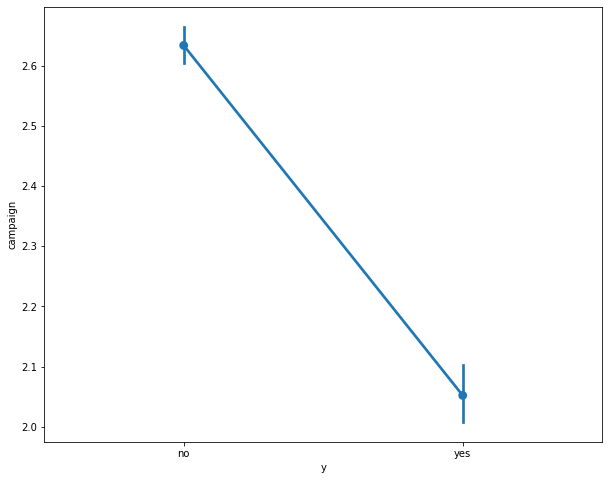

In [68]:
sns.pointplot(x = 'y', y = 'campaign', data = df)

<AxesSubplot:xlabel='y', ylabel='campaign'>

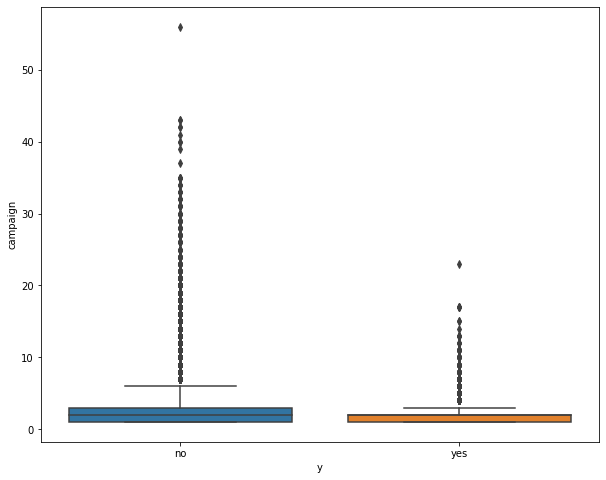

In [72]:
sns.boxplot(x = 'y', y = 'campaign', data = df)

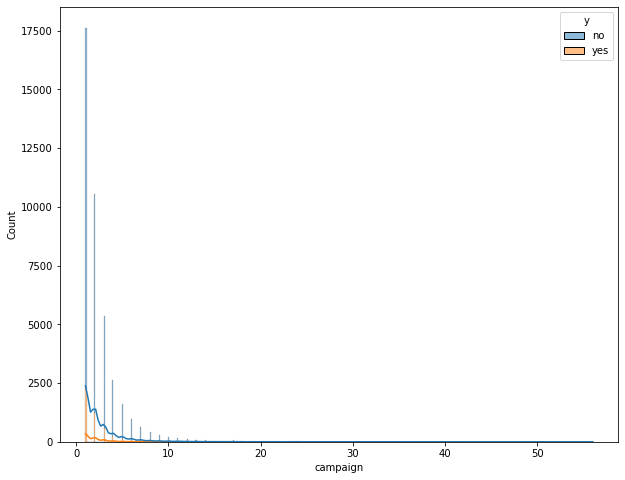

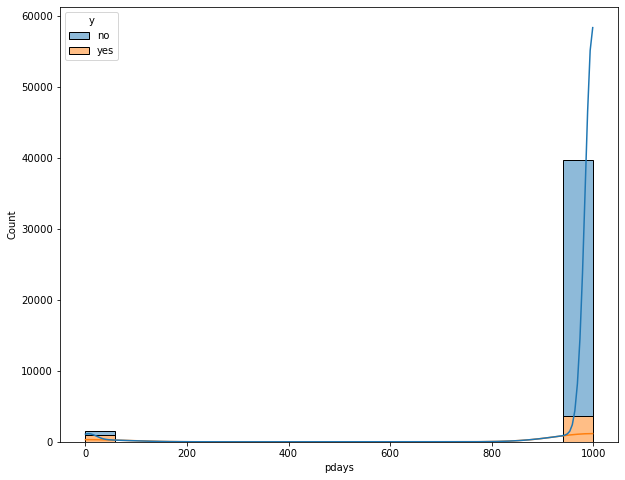

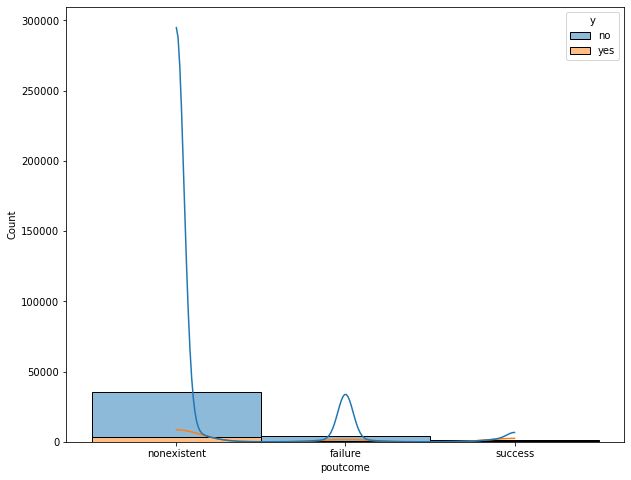

In [94]:
for col in list_num: 
    sns.histplot(x = col, hue = 'y', data = df, kde = True, multiple = 'stack')
    plt.show();

- No encontramos que ninguna de las variables propuestas tengan una elavada influencia en un mayor ratio de éxito de la campaña. Se puede intuir que el exito en campañas anteirores mejora la probabilidad tener éxito.

3- Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

In [95]:
list_econom = ['cons,price,idx', 'cons,price,idx', 'emp,var,rate', 'euribor3m']

/tmp/ipykernel_1628/2043576331.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


<AxesSubplot:>

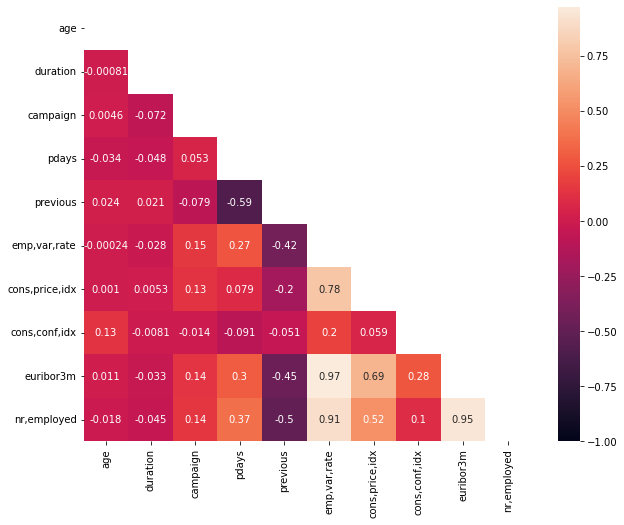

In [67]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), annot = True, mask = mask, vmin = -1)

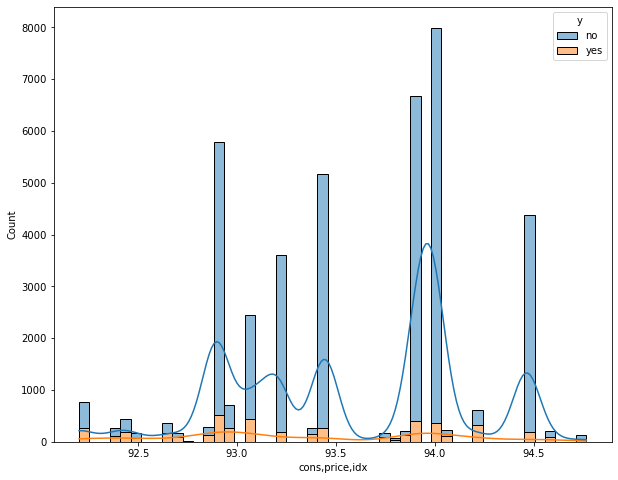

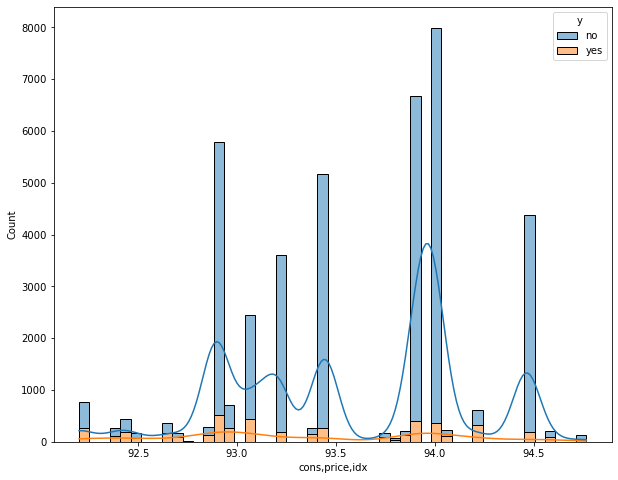

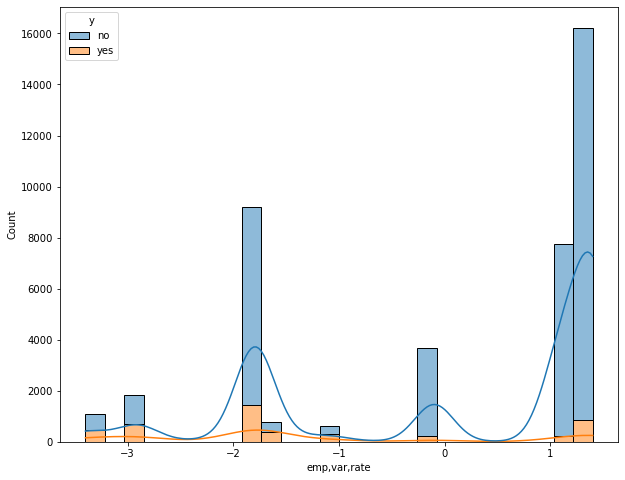

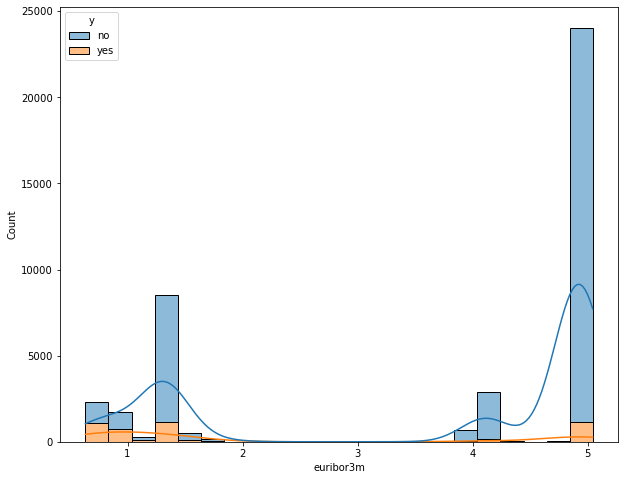

In [98]:
for col in list_econom: 
    sns.histplot(x = col, hue = 'y', data = df, kde = True, multiple = 'stack')
    plt.show();

No parece que haya una relaicón entre el éxito de la campaña y los indicadores económicos.
- Indentificamos una pequeña fluctuación en relaicón al euribor, donde aumenta la probabilidad de exito en los valores más altos y más bajos.

4- Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

  housing  count    percent  cumulative_count  cumulative_percent
0     yes  22561  54.791626             22561           54.791626
1      no  18615  45.208374             41176          100.000000


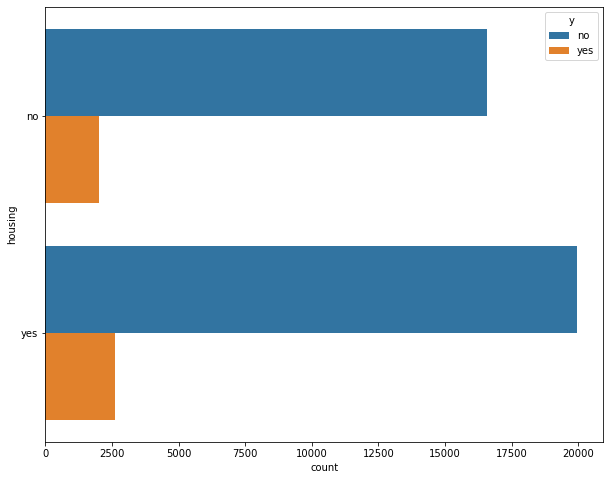

  loan  count    percent  cumulative_count  cumulative_percent
0   no  34928  84.826112             34928           84.826112
1  yes   6248  15.173888             41176          100.000000


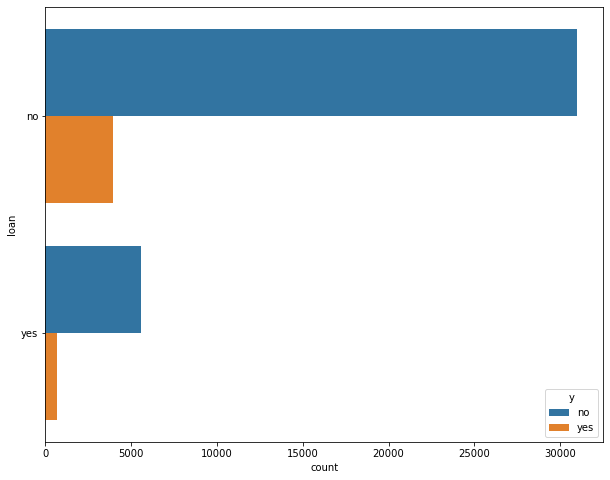

In [99]:
for col in ['housing', 'loan']: 
    print(df.stb.freq([col]))
    sns.countplot(y = col, hue = 'y', data = df)
    plt.show();

- No encontramos diferencias en la distribución del éxito entre las personas que tienen una hipoteca y las que no. Nos llama la atención que haya incluso más casos e los que se acepta la propuesta a pesar de ocntar con una hipoteca que en los que no, aunque este hecho pueda deberse a un mayor número de muestra.

- Hay muy pocas personas encuestadas que cuenten ya con una deuda, por lo que no resulta una categoría explicativa siendo normal que se concentren los síes entres quienes no tienen una deuda previa por ser muchos más. No obstante, también entre los que no cuentan con deuda la proporción de personas que no aceptan la promoción es mucho mayor.

Como conclusión general, podemos intepretar que la campaña no ha sido muy exitosa y de cara al futuro sería interesante plantearse estrategias de marketing diferentes.